ModellingBase::setMesh() copying new mesh ... Found Neumann domain. Setting topography=1.
Found Neumann domain. but 2.5D -> neumann: false
Node: Node: 0x4147450 id: 36	-40	0	0 marker: 0


RuntimeError: ./core/src/mesh.cpp:917		GIMLI::Cell* GIMLI::Mesh::findCell(const GIMLI::RVector3&, size_t&, bool) const  no cells for this node. This is a corrupt mesh

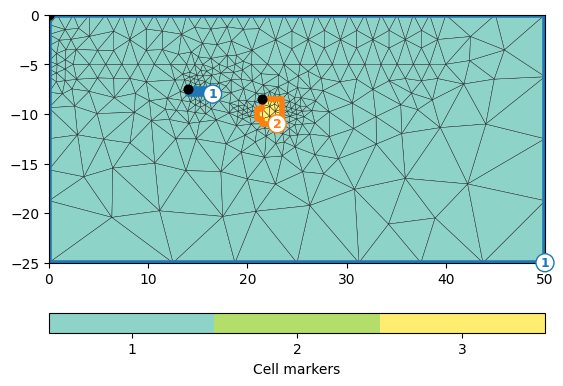

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pygimli as pg
from pygimli import meshtools as mt
from pygimli.physics import ert
import tempfile
import io
import base64

with open('hole.poly') as f:
    poly_file_str = f.read()

# write string to a tempfile
with tempfile.NamedTemporaryFile(suffix='.poly', delete=False) as f:
    f.write(poly_file_str.encode())
    f.close()

    geom = mt.readPLC(f.name)
    # https://www.pygimli.org/pygimliapi/_generated/pygimli.physics.ert.html#pygimli.physics.ert.createData
    scheme = ert.createData(elecs=np.linspace(start=-40, stop=40, num=50), schemeName='dd')
    # ert.show(scheme, ert.geometricFactor(scheme));

    for p in scheme.sensorPositions():
        geom.createNode(p)
        geom.createNode(p - [0, 5])
    # Create a mesh for the finite element modelling with appropriate mesh quality.
    mesh = mt.createMesh(geom, quality=34) # area
    ax, _ = pg.show(mesh, markers=True, showNodes=True, showMesh=True)
    # pg.viewer.noShow()
    rhomap = [
        [1, 150],
        [2, 1700],
        [3, 600]
    ]

    # # ax.margins(0)
    # # plt.savefig('hola.png', bbox_inches='tight')
    # # print(dir(mesh))

    # # # Create a map to set resistivity values in the appropriate regions
    # # # [[regionNumber, resistivity], [regionNumber, resistivity], [...]
    # # rhomap = [
    # #     [0, 50.],
    # #     [1, 100.],
    # #     [2, 20. ],
    # #     [3, 400. ],
    # # ]
    # # apparent resistivity data
    # # view your data at this point:
    # # pg.show(mesh, data=rhomap, label=pg.unit('res'), showMesh=True)

    data = ert.simulate(
        mesh,
        scheme=scheme,
        res=rhomap,
        noiseLevel=1,
        noiseAbs=1e-6,
        seed=1337
    )
    # data.remove(data['rhoa'] < 0)

    # data["err"] = pg.Vector(data.size(), 0.01)
    # mgr = ert.Manager(data)
    # mgr.invert()
    # ax, _ = mgr.showResult(cMin=10, cMax=1000, xlabel="x (m)", ylabel="y (m)",);
    # ax.get_figure().tight_layout()

    # image = io.BytesIO()
    # plt.savefig(image, format='png')

    # base64_png = f'data:image/png;base64,{base64.b64encode(image.getvalue()).decode()}'
    # print(base64_png)

